<a href="https://colab.research.google.com/github/bhoop70233/demo-Project/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:


# Fetch the dataset from the URL
url = "https://lib.stat.cmu.edu/datasets/boston"
response = requests.get(url)
data = response.text

# Split the dataset into lines
lines = data.split('\n')

# Extract the data starting from the 22nd line (where the data starts)
data_lines = lines[22:]

# Join the data lines back into a single string
data_str = '\n'.join(data_lines)

# Read the data using a whitespace delimiter
boston_df = pd.read_csv(StringIO(data_str), delim_whitespace=True, header=None)

# Preview the dataset
print(boston_df.head())


          0      1      2    3      4      5     6       7    8      9     10
0    0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3
1  396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN
2    0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8
3  396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN
4    0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import requests
from io import StringIO

# Fetch the dataset from the URL
url = "https://lib.stat.cmu.edu/datasets/boston"
response = requests.get(url)
data = response.text

# Split the dataset into lines
lines = data.split('\n')

# Extract the data starting from the 22nd line (where the data starts)
data_lines = lines[22:]

# Join the data lines back into a single string
data_str = ' '.join(data_lines)

# Convert the string into a list of floats
data_list = list(map(float, data_str.split()))

# Reshape the list into a 2D array with 14 columns (13 features + 1 target)
data_array = np.array(data_list).reshape(-1, 14)

# Convert the array into a DataFrame
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
boston_df = pd.DataFrame(data_array, columns=column_names)

# Separate features and target
X = boston_df.drop("MEDV", axis=1)
y = boston_df["MEDV"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2017)

# Preview the split datasets
print(X_train.head())
print(y_train.head())


         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
168   2.30040   0.0  19.58   0.0  0.605  6.319   96.1  2.1000   5.0  403.0   
202   0.02177  82.5   2.03   0.0  0.415  7.610   15.7  6.2700   2.0  348.0   
387  22.59710   0.0  18.10   0.0  0.700  5.000   89.5  1.5184  24.0  666.0   
158   1.34284   0.0  19.58   0.0  0.605  6.066  100.0  1.7573   5.0  403.0   
297   0.14103   0.0  13.92   0.0  0.437  5.790   58.0  6.3200   4.0  289.0   

     PTRATIO       B  LSTAT  
168     14.7  297.09  11.10  
202     14.7  395.38   3.11  
387     20.2  396.90  31.99  
158     14.7  353.89   6.43  
297     16.0  396.90  15.84  
168    23.8
202    42.3
387     7.4
158    24.3
297    20.3
Name: MEDV, dtype: float64


In [13]:
n_tree = 50

bag = BaggingRegressor(n_estimators=n_tree, n_jobs=-1)
rf = RandomForestRegressor(n_estimators=n_tree, n_jobs=-1)

bag.fit(X_train, y_train)
rf.fit(X_train, y_train)

bag_pred = np.array([bag.estimators_[tree].predict(X_test) for tree in range(n_tree)])
rf_pred = np.array([rf.estimators_[tree].predict(X_test) for tree in range(n_tree)])

bag_var = np.var(bag_pred, axis=0)
rf_var = np.var(rf_pred, axis=0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

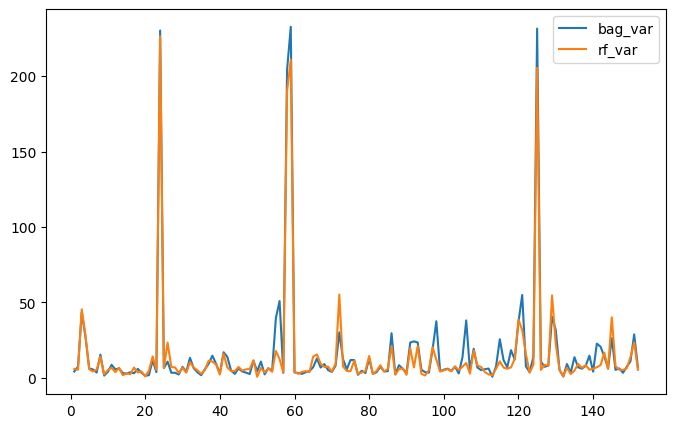

In [14]:
plt.figure(figsize=(8, 5))

plt.plot(range(1, len(bag_var)+1), bag_var)
plt.plot(range(1, len(rf_var)+1), rf_var)
plt.legend(['bag_var', 'rf_var'])
plt.show()

In [16]:
print ('bagging variance average:', round(np.mean(bag_var), 3))
print ('random forest variance average:', round(np.mean(rf_var), 3))

bagging variance average: 15.912
random forest variance average: 14.201
